In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('./data/spotify-2023.csv',  encoding="ISO-8859-1")

In [3]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [4]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## 1 Transformación logarítmica

### Base 10

In [5]:
# Aplicar la transformación logarítmica base 10
df['streams_log10'] = np.log10(df['streams'])

In [6]:
df[['streams','streams_log10']]

,streams,streams_log10
0,141381703,8.150393
1,133716286,8.126184
2,140003974,8.146140
3,800840817,8.903546
4,303236322,8.481781
...,...,...
947,91473363,7.961295
948,121871870,8.085903
949,73513683,7.866368
950,133895612,8.126766


In [7]:
pow(10, 8.150393)

141381635.08837354

### Base 2

In [8]:
# Aplicar la transformación logarítmica base 2
df['streams_log2'] = np.log2(df['streams'])

In [9]:
df[['streams','streams_log2']]

,streams,streams_log2
0,141381703,27.075020
1,133716286,26.994600
2,140003974,27.060893
3,800840817,29.576940
4,303236322,28.175867
...,...,...
947,91473363,26.446848
948,121871870,26.860790
949,73513683,26.131509
950,133895612,26.996533


In [10]:
pow(2, 27.075020)

141381684.96232513

### Base e

In [11]:
# Aplicar la transformación logarítmica base e
df['streams_log'] = np.log(df['streams'])

In [12]:
df[['streams','streams_log']]

,streams,streams_log
0,141381703,18.766974
1,133716286,18.711231
2,140003974,18.757181
3,800840817,20.501173
4,303236322,19.530023
...,...,...
947,91473363,18.331558
948,121871870,18.618481
949,73513683,18.112982
950,133895612,18.712571


In [13]:
pow(math.e, 18.766974)

141381716.54641327

### Ordenamos de mayor a menor

In [14]:
# Entre mayor la base menores los saltos entre las cifras
df[['streams','streams_log10','streams_log','streams_log2']].sort_values(by='streams')

,streams,streams_log10,streams_log,streams_log2
123,2762,3.441224,7.923710,11.431498
393,1365184,6.135191,14.126800,20.380664
144,11599388,7.064435,16.266463,23.467545
142,11956641,7.077609,16.296797,23.511309
68,14780425,7.169687,16.508814,23.817184
...,...,...,...,...
41,2808096550,9.448412,21.755773,31.386945
619,2864791672,9.457093,21.775761,31.415783
86,2887241814,9.460483,21.783567,31.427045
179,3562543890,9.551760,21.993741,31.730261


<Axes: >

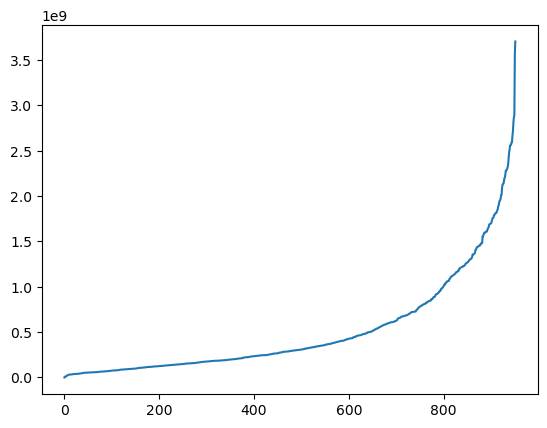

In [15]:
df.sort_values(by='streams').reset_index(drop=True)['streams'].plot()

<Axes: >

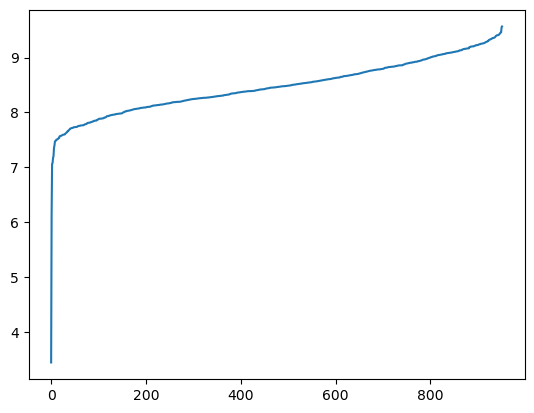

In [16]:
df.sort_values(by='streams').reset_index(drop=True)['streams_log10'].plot()

<Axes: >

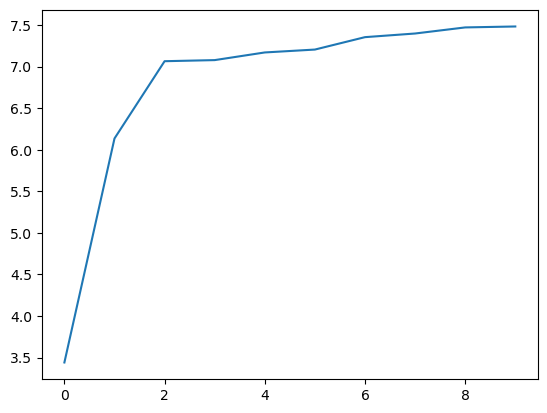

In [17]:
# Realizemos un zoom de los 10 primeros valores
df.sort_values(by='streams').reset_index(drop=True)['streams_log10'][:10].plot()

<Axes: >

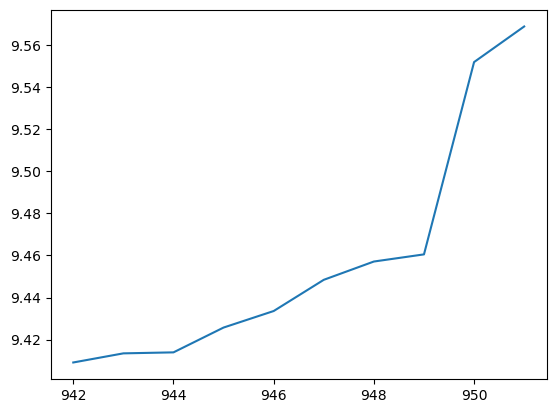

In [18]:
# Realizemos un zoom de los 10 últimos valores
df.sort_values(by='streams').reset_index(drop=True)['streams_log10'][-10:].plot()

<Axes: >

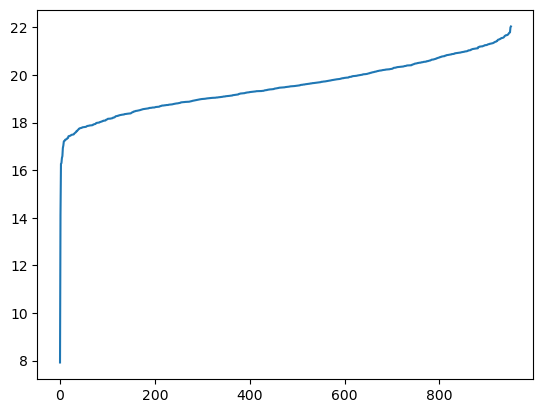

In [19]:
df.sort_values(by='streams').reset_index(drop=True)['streams_log'].plot()

<Axes: >

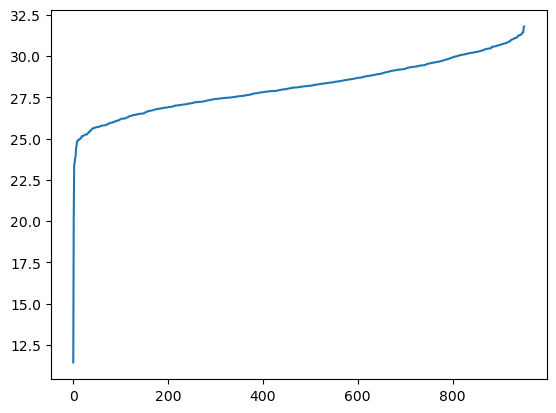

In [20]:
df.sort_values(by='streams').reset_index(drop=True)['streams_log2'].plot()

## 2 Transformación exponencial

<Axes: >

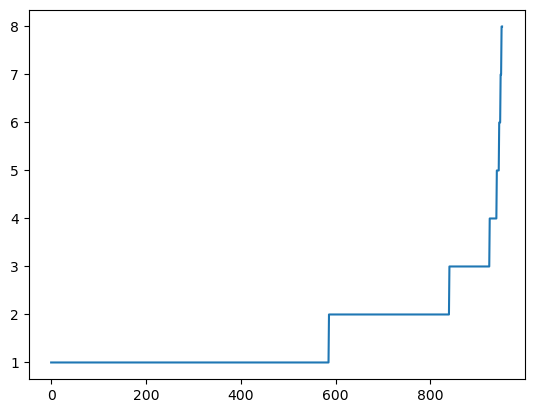

In [21]:
df.sort_values(by='artist_count').reset_index(drop=True)['artist_count'].plot()

In [22]:
df['artist_count_exp'] = np.exp(df['artist_count'] )

In [23]:
df.sort_values(by='artist_count').reset_index(drop=True)[['artist_count', 'artist_count_exp']]

,artist_count,artist_count_exp
0,1,2.718282
1,1,2.718282
2,1,2.718282
3,1,2.718282
4,1,2.718282
...,...,...
947,6,403.428793
948,7,1096.633158
949,7,1096.633158
950,8,2980.957987


<Axes: >

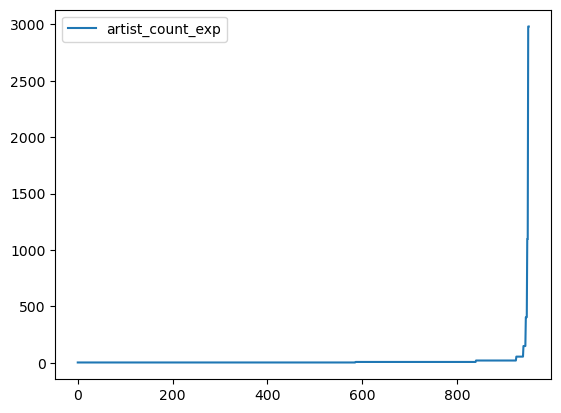

In [24]:
df.sort_values(by='artist_count').reset_index(drop=True)[['artist_count_exp']].plot()